In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import importlib
import config

try:
    importlib.reload(config) # reload module
except NameError:
    pass

# Load DF

In [2]:
df = pd.read_csv(config.ORIGINAL_FILEPATH)
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# EDA

In [3]:
print("DF shape:", {df.shape})

DF shape: {(568630, 31)}


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


Because there are so many samples, we are going to use only a subset of 10.000 samples for EDA purpose to preserve resources.

In [5]:
df_sample = df.sample(n=10_000, replace=False, weights="Class", random_state=8)

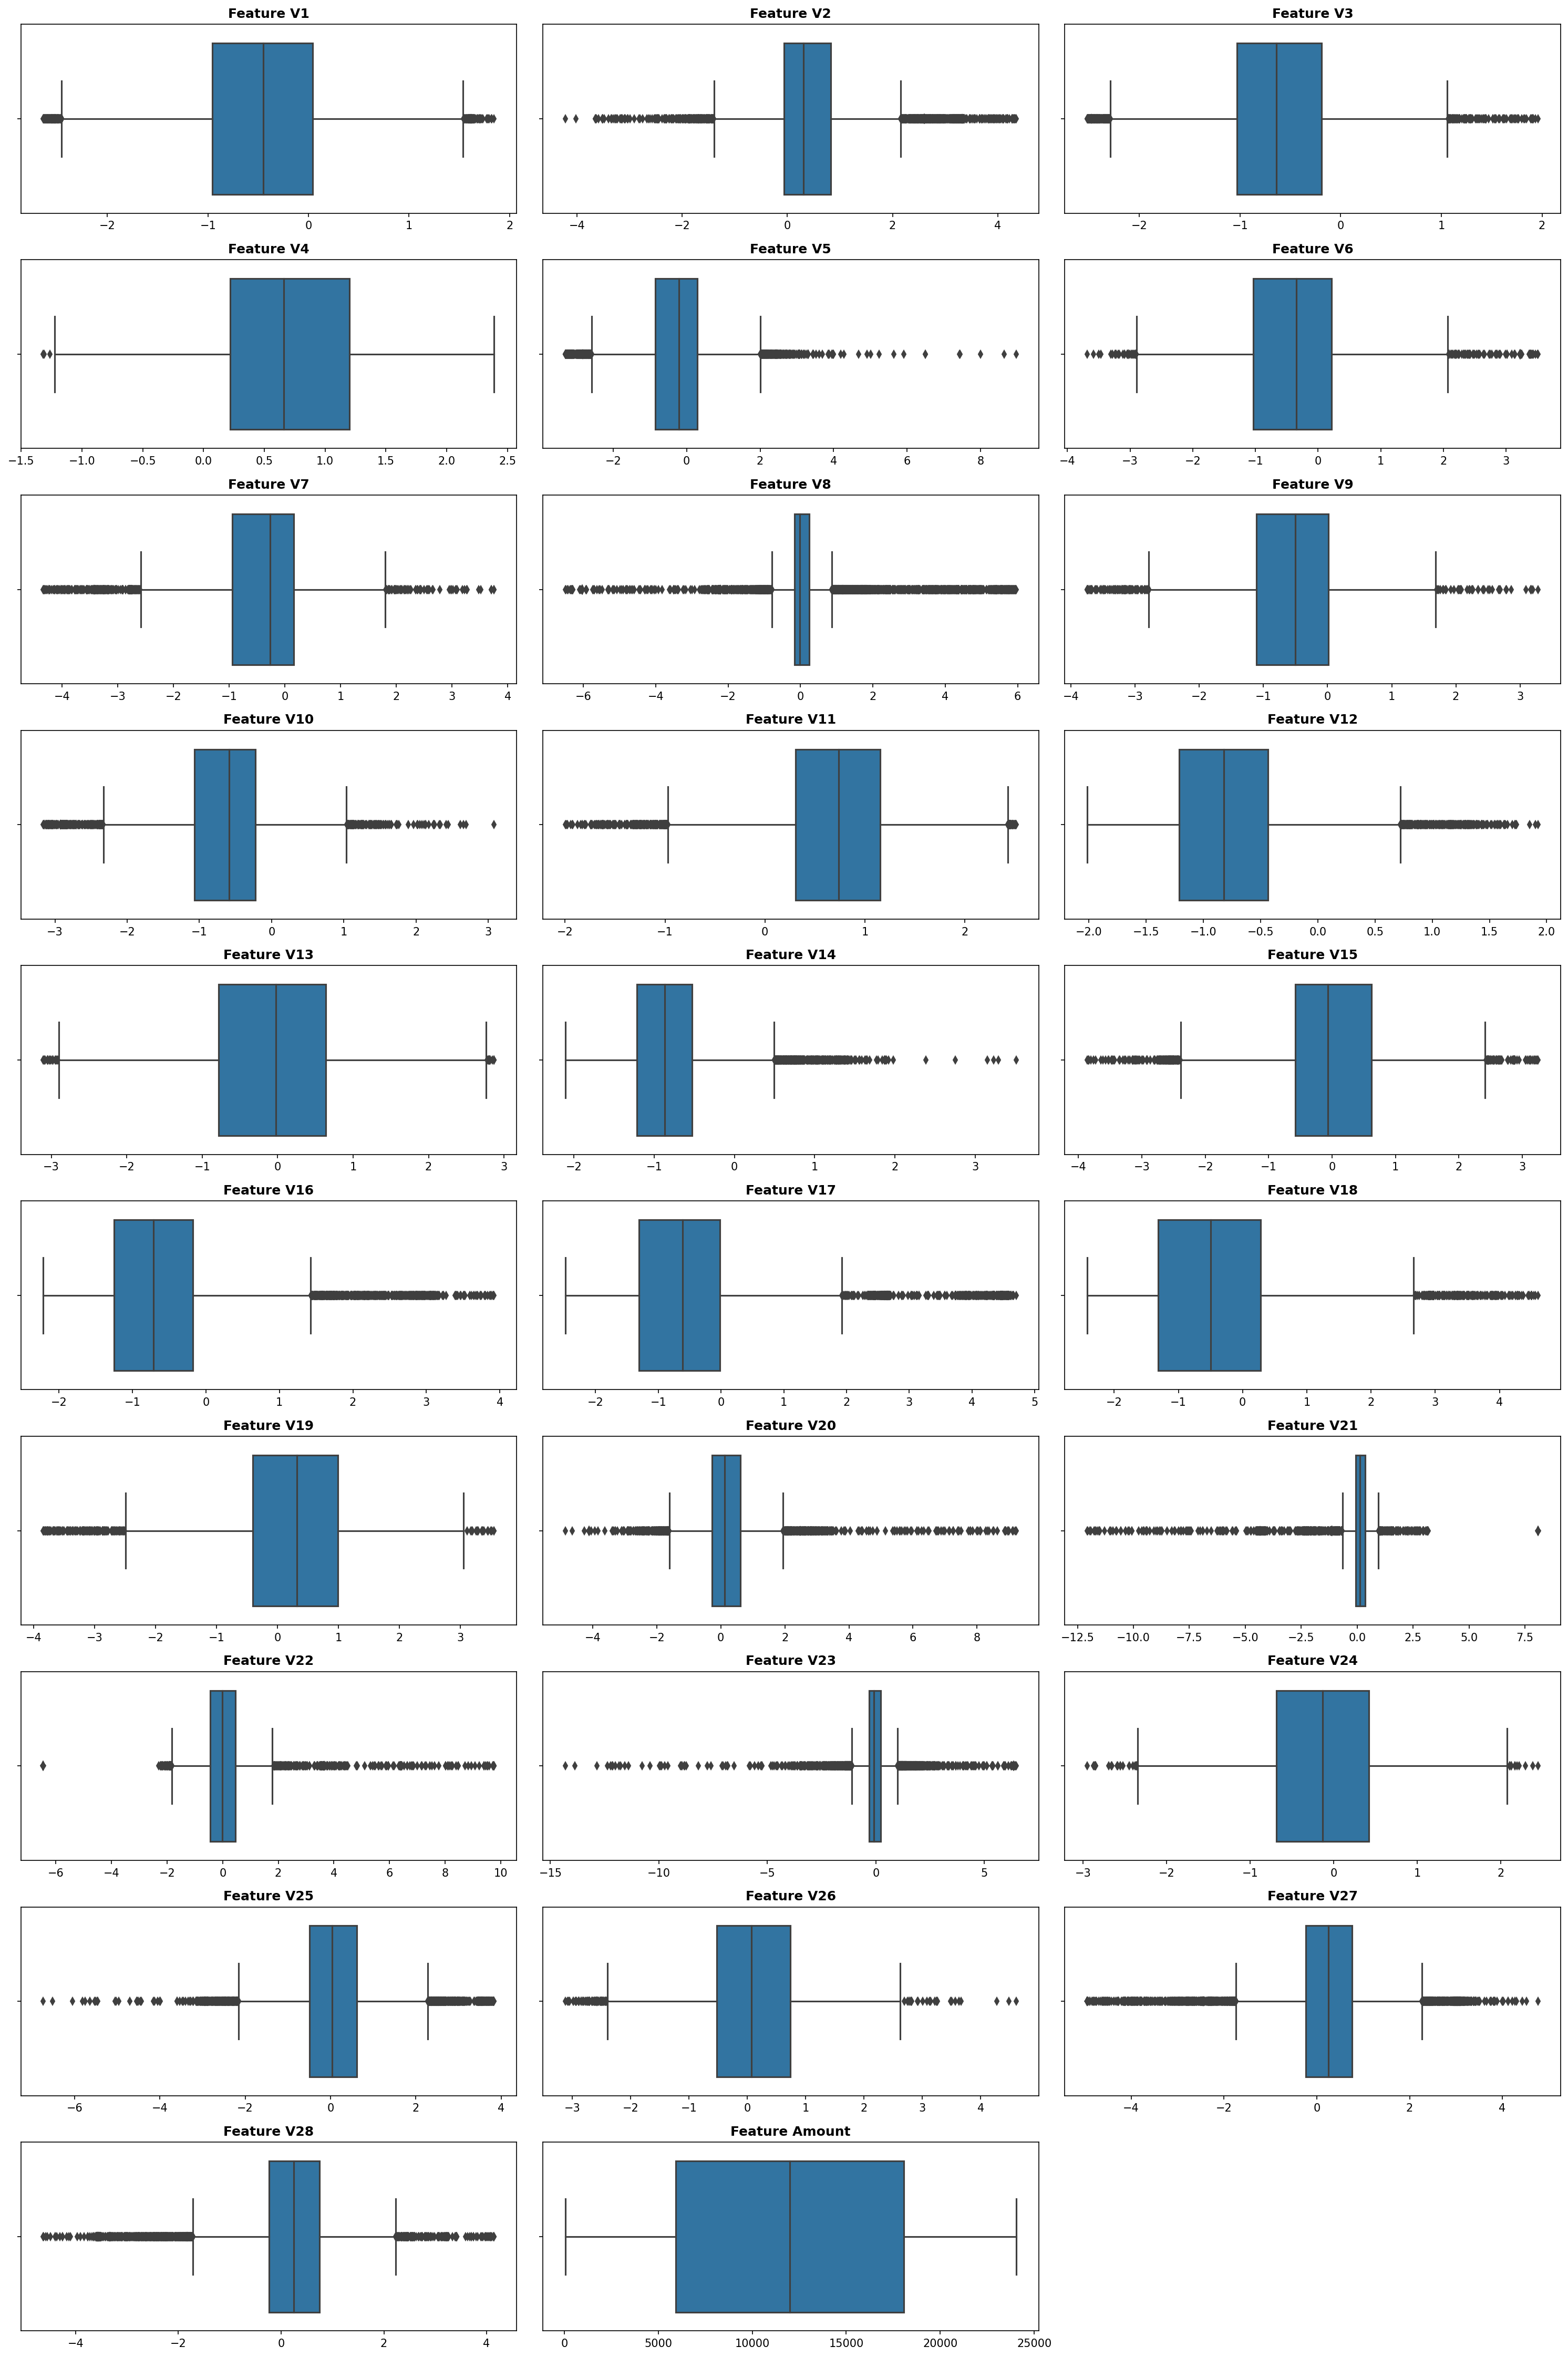

In [6]:
features = df_sample.drop(columns="id")
fig = plt.figure(figsize=(20, 30), dpi=150)
n_cols = 3
n_rows = int(np.ceil(features.shape[-1] / n_cols))

for (i, col) in enumerate(features.columns, start=1):
    if col == "Class":
        continue
    ax = plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=features, x=col, ax=ax)
    ax.set_title(f"Feature {col}", fontweight="bold")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()

In [7]:
fig = plt.figure(figsize=(20, 30), dpi=150)
n_cols = 3
n_rows = int(np.ceil(features.shape[-1] / n_cols))

for (i, col) in enumerate(features.columns, start=1):
    if col == "Class":
        continue
    ax = plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=features, x=col, y="Class", ax=ax)
    ax.set_title(f"Feature {col}", fontweight="bold")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()